In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import cv2
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16

In [9]:
train_dir = "C:\\Users\\sumee\\OneDrive\\Desktop\\FraudShield - Main\\model\\Indian Currency Dataset\\train"
val_dir = "C:\\Users\\sumee\\OneDrive\\Desktop\\FraudShield - Main\\model\\Indian Currency Dataset\\test"

In [10]:
batch_size = 1
epochs = 1
img_height = 224
img_width = 224

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory= train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1247 images belonging to 2 classes.


In [13]:
val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=val_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 220 images belonging to 2 classes.


In [14]:
import warnings

import os
import glob
import matplotlib.pyplot as plt

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
from tensorflow.keras.applications.xception import Xception


In [16]:
base_model = Xception(weights = 'imagenet', include_top=False, input_shape=(224, 224, 3))

In [17]:
base_model.trainable = False

In [18]:
base_model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [19]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [20]:
xception_net = tf.keras.models.Sequential()

xception_net.add(tf.keras.Input(shape=(224, 224, 3)))

xception_net.add(base_model)
xception_net.add(GlobalAveragePooling2D())
xception_net.add(Dense(2, activation = 'softmax'))
xception_net.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,865,578 (79.60 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [21]:
xception_net.compile(optimizer= 'adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = xception_net.fit(train_data_gen, epochs = 20,
validation_data = val_data_gen)

Epoch 1/20


C:\Users\sumee\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1247/1247 ━━━━━━━━━━━━━━━━━━━━ 382s 302ms/step - accuracy: 0.7736 - loss: 0.4357 - val_accuracy: 0.8636 - val_loss: 0.3014
Epoch 2/20
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 363s 291ms/step - accuracy: 0.9064 - loss: 0.1990 - val_accuracy: 0.8227 - val_loss: 0.3655
Epoch 3/20
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 352s 282ms/step - accuracy: 0.9518 - loss: 0.1281 - val_accuracy: 0.8955 - val_loss: 0.2396
Epoch 4/20
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 297s 237ms/step - accuracy: 0.9752 - loss: 0.0971 - val_accuracy: 0.9136 - val_loss: 0.2167
Epoch 5/20
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 296s 237ms/step - accuracy: 0.9726 - loss: 0.0726 - val_accuracy: 0.9182 - val_loss: 0.1995
Epoch 6/20
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 293s 235ms/step - accuracy: 0.9834 - loss: 0.0555 - val_accuracy: 0.9364 - val_loss: 0.1687
Epoch 7/20
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 301s 241ms/step - accuracy: 0.9901 - loss: 0.0429 - val_accuracy: 0.9273 - val_loss: 0.2152
Epoch 8/20
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 275s 220ms/step - accuracy: 0.9

In [23]:
xception_net.save('currency.h5')

In [24]:
import numpy as np

In [25]:
y = np.concatenate([val_data_gen.__next__()[1] for i in range(len(val_data_gen))])
true_labels = np.argmax(y, axis=-1)
true_labels = np.argmax(y, axis=-1)
prediction = xception_net.predict(val_data_gen, verbose=2)
prediction = np.argmax(prediction, axis=-1)

220/220 - 39s - 177ms/step


In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true = true_labels, y_pred = prediction)

In [29]:
cm_plot_labels = ['Fake','Real']

Confusion matrix, without normalization
[[ 94   0]
 [ 10 116]]
Accuracy: 0.955
Precision: 1.000
Recall: 0.955
F-Measure: 0.955


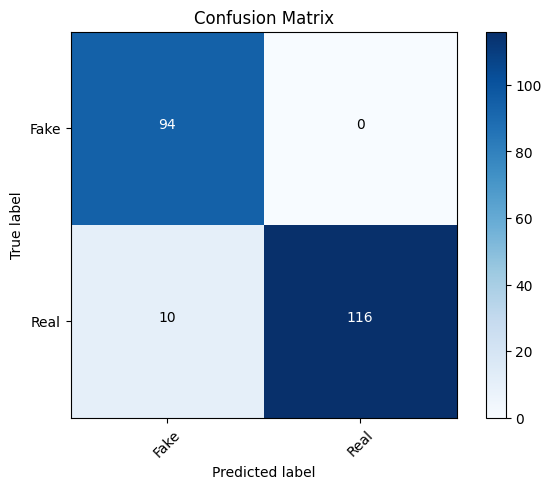

In [30]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction)
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)